### How do the volumes of citations track year over year.  Since the City of Scottsdale only releases one prior year of citation data on a weekly rolling basis, I have combined the years I have downloaded so far.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
# pd.options.display.float_format = '{:.0f}'.format

In [4]:
files = glob.glob('data/*.csv')

citations = pd.concat([pd.read_csv(f) \
                      for f in files], sort=True)

In [7]:
def setcols(citations, fn=lambda x: x.columns.map('_'.join), cols=None):
    """ function sets the column of the data frame to the passed column list.
    """
    if cols:
        citations.columns = cols
    else:
        citations.columns = fn(citations)
    return citations

citations = citations.pipe(
        setcols,
        fn=lambda x: x.columns.str.lower()
        .str.strip()
        .str.replace(" ", "_"))

In [75]:
citations.head()

,arizona_statute_code,beat,charge_description,citation_#,citation_date,citation_time,citation_type_code,citation_type_description,cited_person,cited_person_age,cited_person_ethnicity,cited_person_race,cited_person_sex,city,district,officer_badge_#,state,street,street_number,zip,zone,tcmainid,year_month
0,97XX,12.0,Amended Charge,2074492,2018-12-20,2222,CV,Civil Traffic,"Way, Dennis",51,U,W,M,Scottsdale,D3,1476,AZ,E Sahuaro DR / N Scottsdale Rd,xxx,NaN,3003,641301,2018.12
1,28-701A,10.0,Speed Greater Than R&P or Posted,8093305,2018-12-20,844,CV,Civil Traffic,"Grady, Scott",61,U,W,M,Scottsdale,D3,780,AZ,N Scottsdale Rd,8xxx,NaN,2601,641302,2018.12
2,28-4135C,3.0,No Proof of Insurance,2076259,2018-12-18,2147,CV,Civil Traffic,"Dudgeon, Miranda",20,U,W,F,Scottsdale,D1,1509,AZ,E Osborn Rd / N Scottsdale Rd,xxx,NaN,706,641303,2018.12
3,28-2532A,5.0,Expired/No Arizona Registration,8093703,2018-12-21,2116,CV,Civil Traffic,"Fox, William",34,U,W,M,Scottsdale,D2,826,AZ,E Chaparral Rd / N Hayden Rd,xxx,NaN,1106,641304,2018.12
4,28-4135C,15.0,No Proof of Insurance,2053182,2018-12-20,2324,CV,Civil Traffic,"Rhoden, David",24,U,W,M,Scottsdale,D4,1440,AZ,E Frank Lloyd Wright Bl / N Hayden Rd,xxx,NaN,3604,641305,2018.12


In [ ]:
# remove duplicate citations due to overlap in data being downloaded
citations.drop_duplicates('citation_#', inplace=True)



In [70]:
# convert citation date to datetime format
citations['citation_date'] = pd.to_datetime(citations['citation_date'])

In [74]:
# combine both month and year into same column
citations['year_month'] = citations['citation_date'].apply(lambda x: str(x.year) + '.' + str(x.month).zfill(2))

In [98]:
citations.groupby('year_month')['year_month'].count().iloc[1:21]

year_month
2017.10    2561
2017.11    2425
2017.12    2266
2018.01    2252
2018.02    2024
2018.03    2359
2018.04    2125
2018.05    2542
2018.06    2069
2018.07    2130
2018.08    2134
2018.09    2146
2018.10    1830
2018.11    1826
2018.12    1833
2019.01    1977
2019.02    1799
2019.03    1932
2019.04    1894
2019.05    2068
Name: year_month, dtype: int64

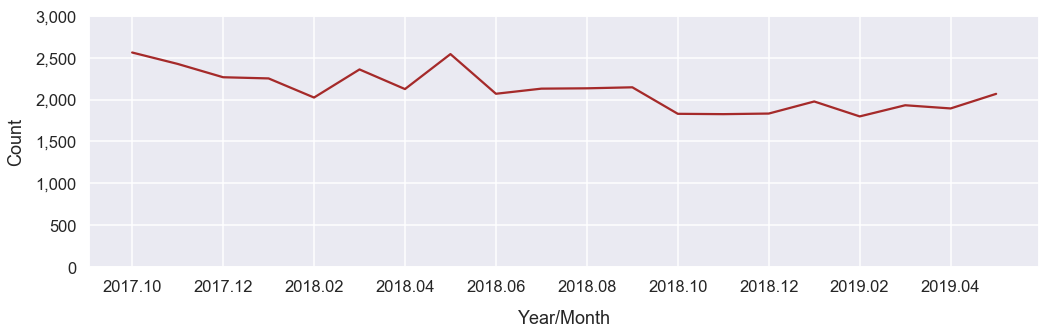

In [128]:
sns.set(rc={'figure.figsize':(15,5)})

sns.set_context('talk')
plt.tight_layout()

ax = sns.lineplot(x=citations.groupby('year_month')['year_month'].count().iloc[1:21].index, 
                  y=citations.groupby('year_month')['year_month'].count().iloc[1:21].values, 
                 color='brown')

# plt.title("xxx")
plt.ylim(0, 3000)
plt.xlabel("Year/Month", labelpad=15)
plt.ylabel("Count", labelpad=10)

ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.tight_layout()

plt.savefig("visualizations/year_over_year.png")